<h1 align=center> Taller 2</h1>

Integrantes:
- Sebastián Hernández
- Axel Mondaca

In [33]:
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score




### Importación de archivos

In [34]:
features = pd.read_csv('features.txt', sep=r'\s+', header=None, names=['feature_id','feature_name'])
activity_labels = pd.read_csv('activity_labels.txt', sep=r'\s+', header=None, names=['activity_id', 'activity_name'])

X_train = pd.read_csv('X_train.txt', sep=r'\s+', header=None)
X_test = pd.read_csv('X_test.txt', sep=r'\s+', header=None)
y_train = pd.read_csv('y_train.txt', header=None)
y_test = pd.read_csv('y_test.txt', header=None)

X_train.columns = features['feature_name']
X_test.columns = features['feature_name']

y_test.columns = ['activity_id']
y_train.columns = ['activity_id']
activity_map = dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))

y_train['activity_name'] = y_train['activity_id'].map(activity_map)
y_test['activity_name'] = y_test['activity_id'].map(activity_map)

X_test

feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


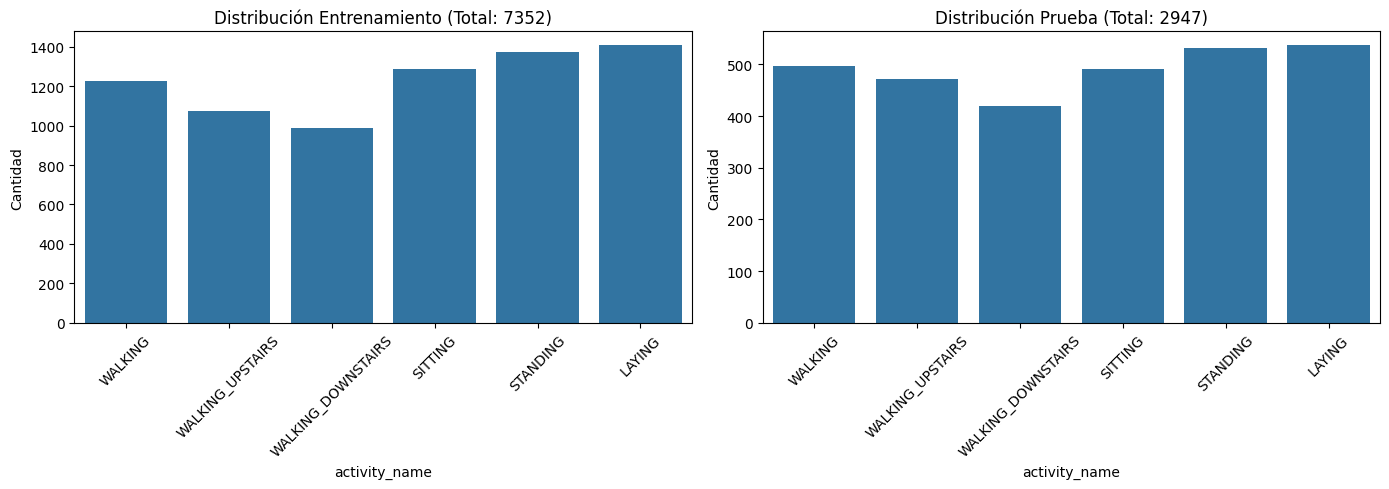

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico Entrenamiento
sns.countplot(x='activity_name', data=y_train, ax=axes[0], order=activity_labels['activity_name'])
axes[0].set_title(f'Distribución Entrenamiento (Total: {len(y_train)})')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Cantidad')

# Gráfico Prueba
sns.countplot(x='activity_name', data=y_test, ax=axes[1], order=activity_labels['activity_name'])
axes[1].set_title(f'Distribución Prueba (Total: {len(y_test)})')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


In [36]:
print("Datos faltantes en X_train:", X_train.isnull().sum().sum())
print("Datos faltantes en X_test:", X_test.isnull().sum().sum())

print("Mínimos correctos (>=-1):", (X_train.min() >= -1).all())
print("Máximos correctos (<=1):", (X_train.max() <= 1).all())

print("Mínimos correctos (>=-1):", (X_test.min() >= -1).all())
print("Máximos correctos (<=1):", (X_test.max() <= 1).all())


Datos faltantes en X_train: 0
Datos faltantes en X_test: 0
Mínimos correctos (>=-1): True
Máximos correctos (<=1): True
Mínimos correctos (>=-1): True
Máximos correctos (<=1): True


Con esto verificamos que todos los datos se encuentran normalizados

In [37]:
grupos = {
    'Tiempo - Acelerómetro': [c for c in X_train.columns if c.startswith('t') and 'Acc' in c],
    'Tiempo - Giroscopio':   [c for c in X_train.columns if c.startswith('t') and 'Gyro' in c],
    'Frecuencia - Acelerómetro': [c for c in X_train.columns if c.startswith('f') and 'Acc' in c],
    'Frecuencia - Giroscopio':   [c for c in X_train.columns if c.startswith('f') and 'Gyro' in c]
}

stats_data = []

for nombre, cols in grupos.items():
    valores = X_train[cols].values.flatten()
    
    stats_data.append({
        'Grupo': nombre,
        'Media': valores.mean(),
        'Desv. Estándar': valores.std(),
        'Mínimo': valores.min(),
        'Máximo': valores.max()
    })

df_stats = pd.DataFrame(stats_data).set_index('Grupo')


display(df_stats.round(4))

,Media,Desv. Estándar,Mínimo,Máximo
Grupo,,,,
Tiempo - Acelerómetro,-0.2693,0.5734,-1.0,1.0
Tiempo - Giroscopio,-0.2972,0.5444,-1.0,1.0
Frecuencia - Acelerómetro,-0.8049,0.3237,-1.0,1.0
Frecuencia - Giroscopio,-0.8291,0.3155,-1.0,1.0


In [38]:
variances = X_train.var()

constant_features = variances[variances == 0]
print(f"Características constantes (Varianza = 0): {len(constant_features)}")

threshold = 0.005
low_variance_features = variances[variances < threshold]

print(f"Características con varianza menor a {threshold}: {len(low_variance_features)}")

if len(low_variance_features) > 0:
    print("\nTop 10 características con menor varianza (candidatas a eliminar):")
    display(low_variance_features.sort_values())

Características constantes (Varianza = 0): 0
Características con varianza menor a 0.005: 7

Top 10 características con menor varianza (candidatas a eliminar):


feature_name
tBodyAcc-mean()-Y                   0.001665
tBodyAcc-mean()-Z                   0.003208
fBodyAccJerk-bandsEnergy()-57,64    0.003367
fBodyGyro-bandsEnergy()-33,40       0.004192
fBodyGyro-bandsEnergy()-33,40       0.004287
fBodyGyro-bandsEnergy()-33,48       0.004666
tBodyAcc-mean()-X                   0.004937
dtype: float64

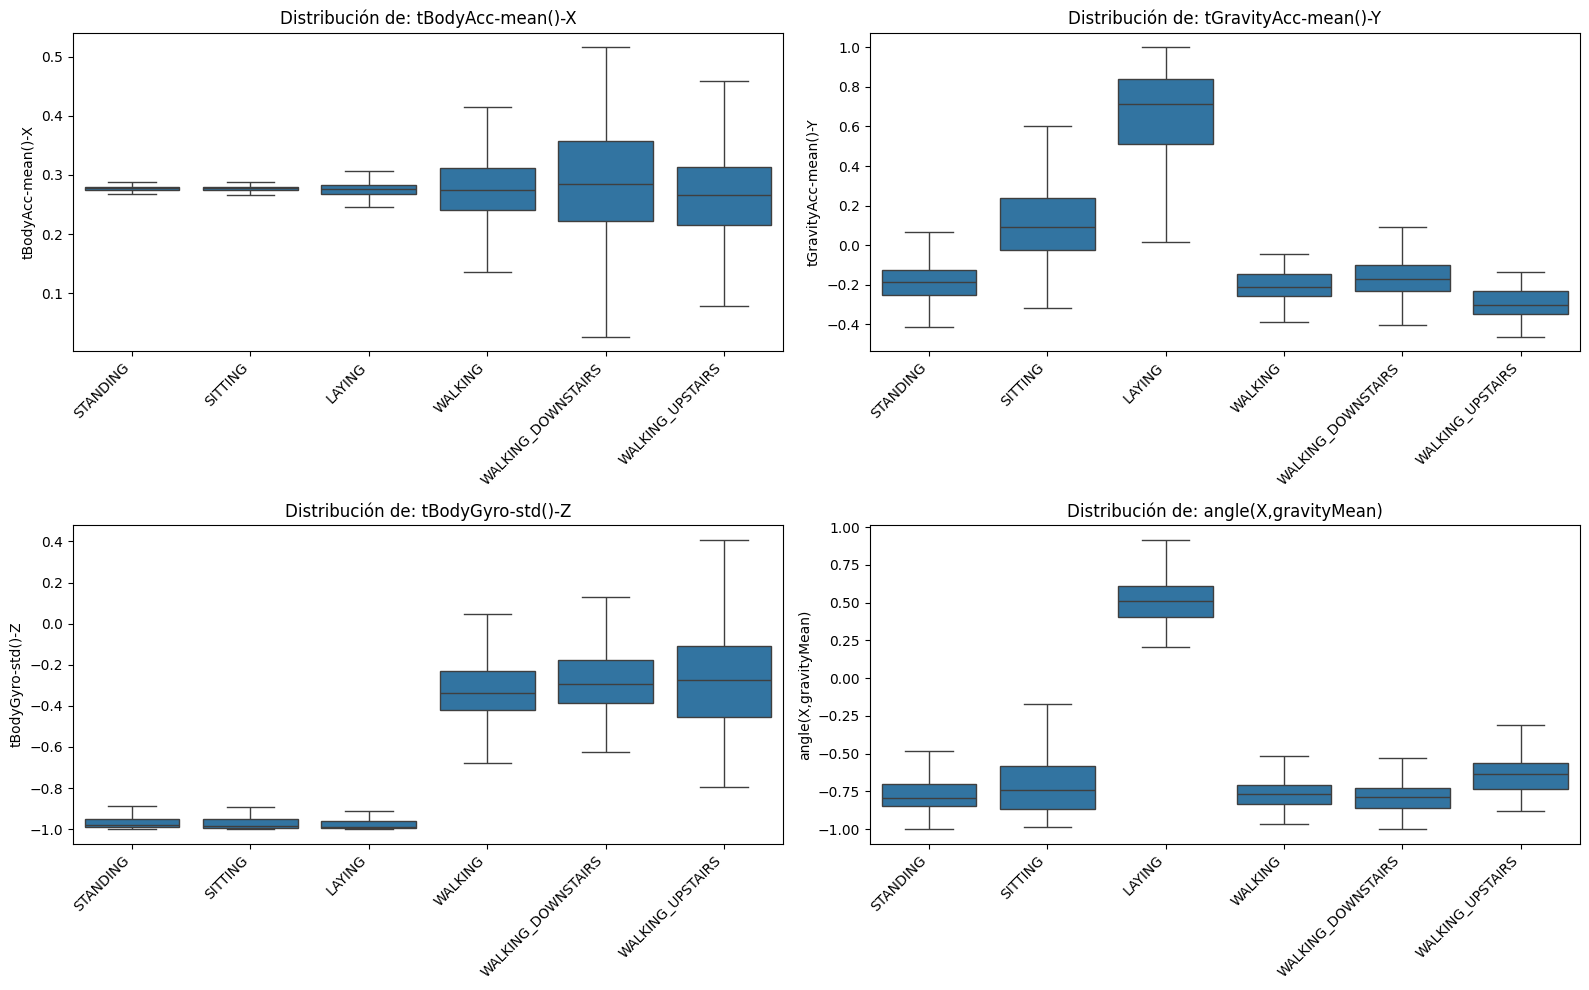

In [39]:
plot_data = X_train.copy()

plot_data['Activity'] = y_train['activity_name']

selected_features = [
    'tBodyAcc-mean()-X',       
    'tGravityAcc-mean()-Y',   
    'tBodyGyro-std()-Z',      
    'angle(X,gravityMean)'   
]

plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Activity', y=feature, data=plot_data, showfliers=False)
    plt.title(f'Distribución de: {feature}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
plt.tight_layout()
plt.show()

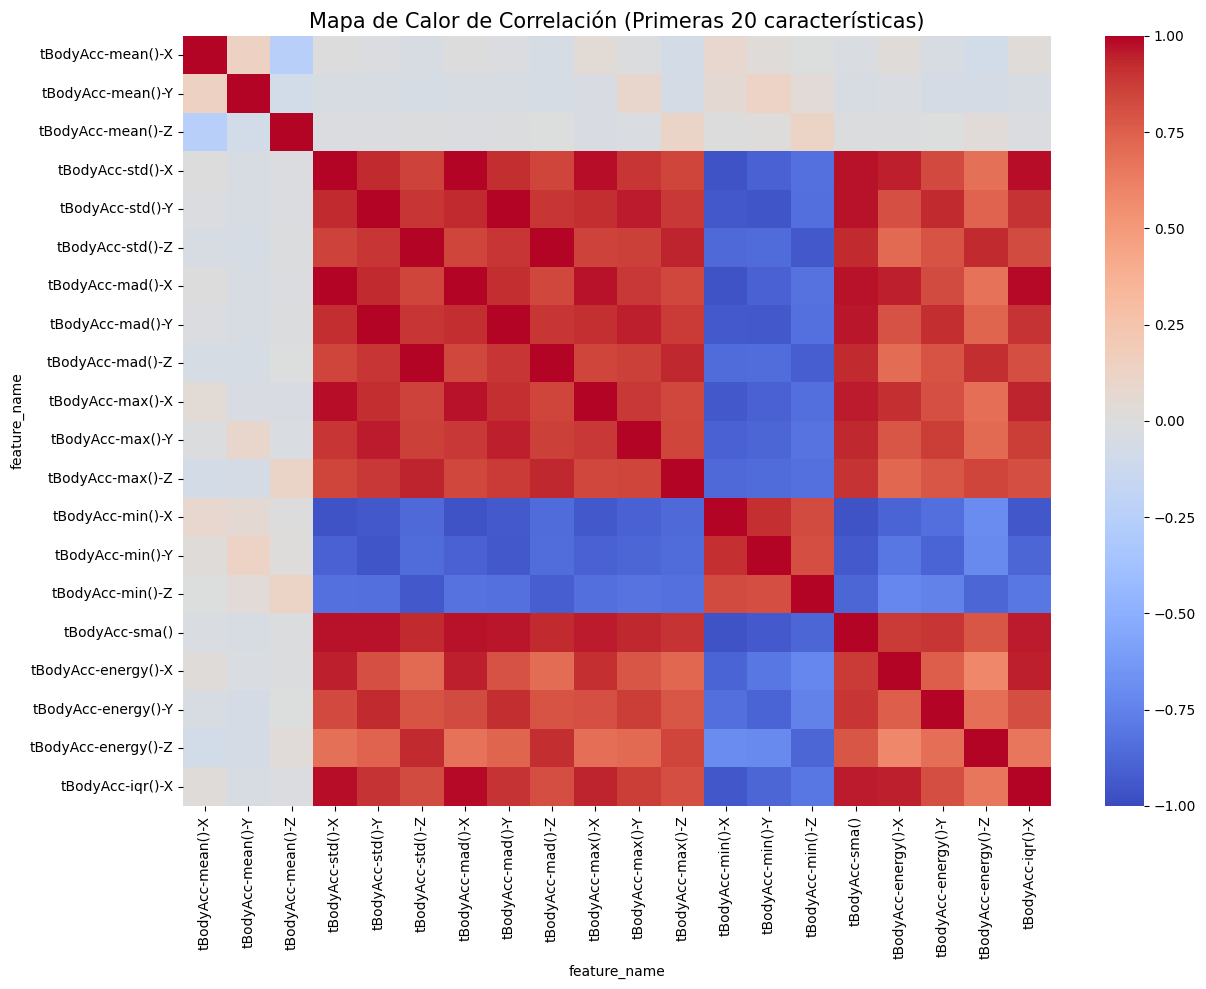

In [40]:
subset_features = X_train.columns[:20] 
corr_matrix = X_train[subset_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación (Primeras 20 características)', fontsize=15)
plt.show()

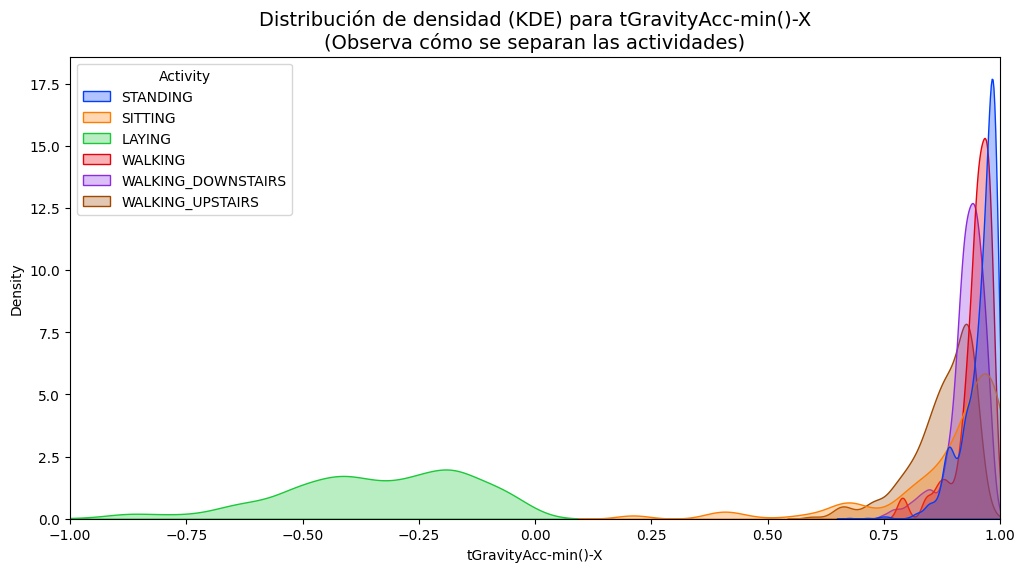

In [41]:
discriminative_feat = 'tGravityAcc-min()-X'

plt.figure(figsize=(12, 6))
sns.kdeplot(data=plot_data, x=discriminative_feat, hue='Activity', fill=True, common_norm=False, palette='bright', alpha=0.3)
plt.title(f'Distribución de densidad (KDE) para {discriminative_feat}\n(Observa cómo se separan las actividades)', fontsize=14)
plt.xlim(-1, 1)
plt.show()

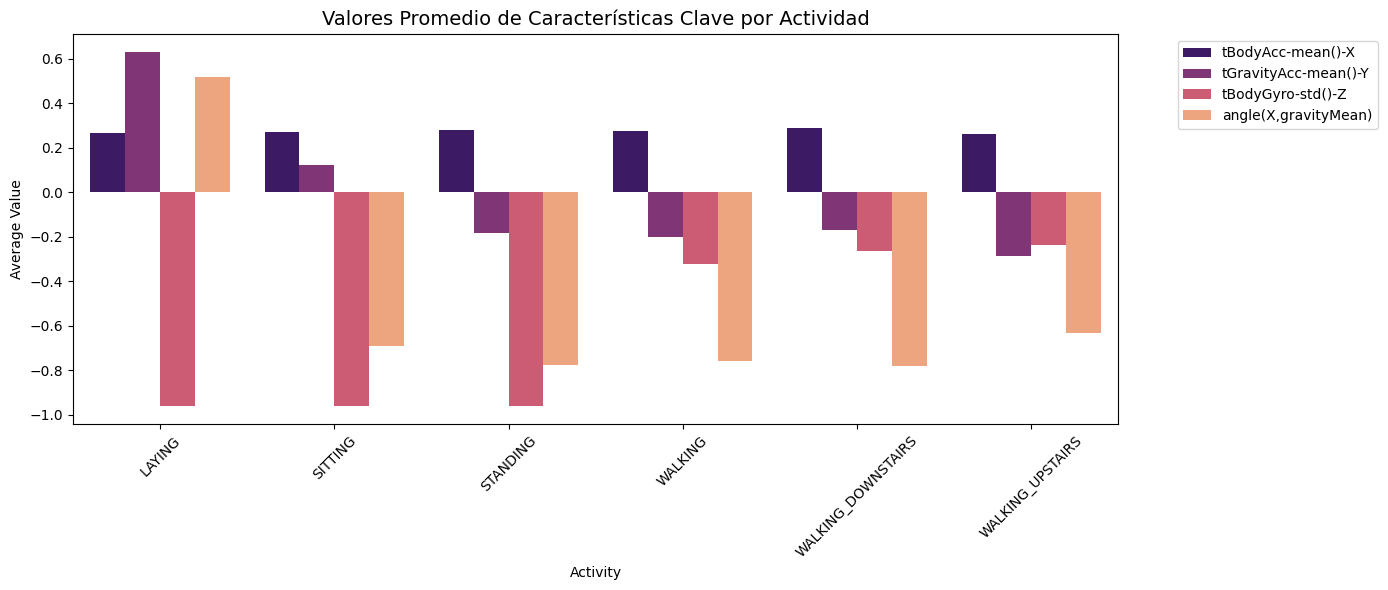

In [42]:
avg_values = plot_data.groupby('Activity')[selected_features].mean().reset_index()
avg_melted = avg_values.melt(id_vars='Activity', var_name='Feature', value_name='Average Value')

plt.figure(figsize=(14, 6))
sns.barplot(x='Activity', y='Average Value', hue='Feature', data=avg_melted, palette='magma')
plt.title('Valores Promedio de Características Clave por Actividad', fontsize=14)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Preparación de datos

In [43]:
min_val_original = X_train.min().min()
max_val_original = X_train.max().max()

print(f"Rango original de valores: [{min_val_original:.6f}, {max_val_original:.6f}]")

cols_out_range = X_train.columns[(X_train.min() < -1) | (X_train.max() > 1)]
print(f"Características con valores fuera de [-1, 1]: {len(cols_out_range)}")

X_train_clean = X_train.clip(lower=-1.0, upper=1.0)
X_test_clean = X_test.clip(lower=-1.0, upper=1.0)

print("-> Se ha aplicado 'clipping' para ajustar valores al rango estricto [-1, 1].")

X_train_final = X_train_clean.astype('float64')
X_test_final = X_test_clean.astype('float64')

if isinstance(y_train, pd.DataFrame):
    y_train_final = y_train.iloc[:, 0].astype(int) 
    y_test_final = y_test.iloc[:, 0].astype(int)
else:
    y_train_final = y_train.astype(int)
    y_test_final = y_test.astype(int)
    
print("-> Estructuras convertidas a formatos compatibles con Sklearn (X: float64, y: int).")

print("\n--- DIMENSIONES FINALES DOCUMENTADAS ---")
print(f"Conjunto de Entrenamiento (X): {X_train_final.shape}")
print(f"Etiquetas de Entrenamiento (y): {y_train_final.shape}")
print(f"Conjunto de Prueba (X):        {X_test_final.shape}")
print(f"Etiquetas de Prueba (y):        {y_test_final.shape}")

assert X_train_final.shape[0] == y_train_final.shape[0], "Error: Desajuste filas Train"
assert X_test_final.shape[0] == y_test_final.shape[0], "Error: Desajuste filas Test"
print("-> Validación de integridad: EXITOSA")

Rango original de valores: [-1.000000, 1.000000]
Características con valores fuera de [-1, 1]: 0
-> Se ha aplicado 'clipping' para ajustar valores al rango estricto [-1, 1].
-> Estructuras convertidas a formatos compatibles con Sklearn (X: float64, y: int).

--- DIMENSIONES FINALES DOCUMENTADAS ---
Conjunto de Entrenamiento (X): (7352, 561)
Etiquetas de Entrenamiento (y): (7352,)
Conjunto de Prueba (X):        (2947, 561)
Etiquetas de Prueba (y):        (2947,)
-> Validación de integridad: EXITOSA


### Modelos lineales y de distancia

In [44]:
k_values = [1, 3, 5, 7]
cv_scores = {}

print("Ejecutando Validación Cruzada para k-NN (5 folds)...")
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_final, y_train_final, cv=5, scoring='accuracy')
    cv_scores[k] = scores.mean()
    print(f"k={k}: Accuracy Promedio CV = {scores.mean():.4f}")

optimal_k = max(cv_scores, key=cv_scores.get)
print(f"\n-> El valor óptimo de k identificado es: {optimal_k} (Acc: {cv_scores[optimal_k]:.4f})")

models_to_run = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=254),
}

for k in k_values:
    models_to_run[f'k-NN (k={k})'] = KNeighborsClassifier(n_neighbors=k)

results_list = []
confusion_matrices = {}


Ejecutando Validación Cruzada para k-NN (5 folds)...
k=1: Accuracy Promedio CV = 0.8792
k=3: Accuracy Promedio CV = 0.8919
k=5: Accuracy Promedio CV = 0.8968
k=7: Accuracy Promedio CV = 0.8996

-> El valor óptimo de k identificado es: 7 (Acc: 0.8996)


### Modelos probabilísticos y basados en arboles

In [45]:
for name, model in models_to_run.items():
    start_time = time.time()
    model.fit(X_train_final, y_train_final)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(y_test_final, y_pred)
    cm = confusion_matrix(y_test_final, y_pred)
    
    results_list.append({
        'Modelo': name,
        'Accuracy': acc,
        'Tiempo Entrenamiento (s)': training_time
    })
    confusion_matrices[name] = cm

results_df = pd.DataFrame(results_list).sort_values(by='Accuracy', ascending=False)

print("\n--- TABLA RESUMEN DE RENDIMIENTO ---")
display(results_df)

c:\Users\axel0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- TABLA RESUMEN DE RENDIMIENTO ---


,Modelo,Accuracy,Tiempo Entrenamiento (s)
0,Logistic Regression,0.960638,3.588409
4,k-NN (k=7),0.903291,0.033451
3,k-NN (k=5),0.901595,0.026746
2,k-NN (k=3),0.890736,0.031338
1,k-NN (k=1),0.878521,0.028135


In [46]:
for name, cm in confusion_matrices.items():
    print(f"\nModelo: {name}")
    labels = sorted(activity_labels['activity_name'].unique()) if 'activity_labels' in locals() else None
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    print(df_cm)


Modelo: Logistic Regression
                    LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
LAYING                 493        0         3        0                   0   
SITTING                 25      445         1        0                   0   
STANDING                 3       11       406        0                   0   
WALKING                  0        3         0      430                  58   
WALKING_DOWNSTAIRS       1        0         0       11                 520   
WALKING_UPSTAIRS         0        0         0        0                   0   

                    WALKING_UPSTAIRS  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 537  

Modelo: k-NN (k=1)
                    LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
LAYING                 473        8        15        

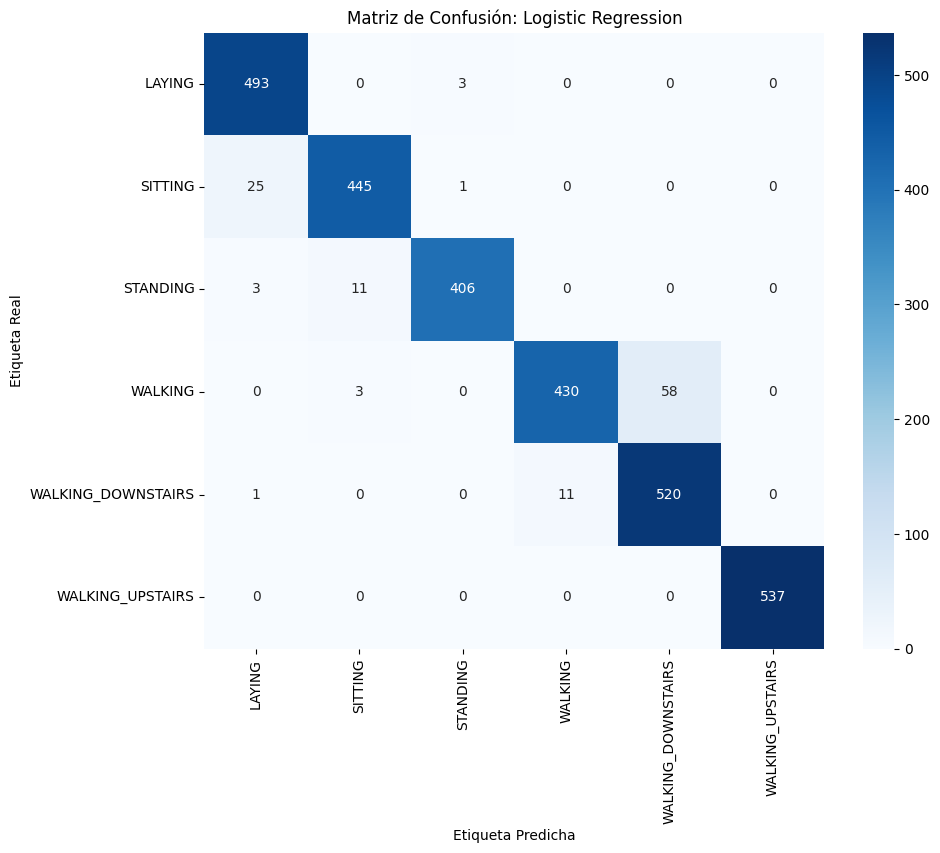

In [47]:
best_model_name = results_df.iloc[0]['Modelo']
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrices[best_model_name], annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title(f'Matriz de Confusión: {best_model_name}')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### Tabla comparativa para el mejor modelo

In [48]:
models_prob_tree = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest (n=100)': RandomForestClassifier(n_estimators=100, random_state=254, n_jobs=-1),
    'SVM (Kernel RBF)': SVC(kernel='rbf', random_state=42)
}

depths = [5, 10, 20, None]
for d in depths:
    name = f'Decision Tree (Depth={d})'
    models_prob_tree[name] = DecisionTreeClassifier(max_depth=d, random_state=42)

results_2b = []
best_f1_macro = 0
best_model_name = ""
best_y_pred = None

print(f"{'Modelo':<30} | {'Macro F1':<10} | {'Tiempo (s)':<10}")
print("-" * 55)

for name, model in models_prob_tree.items():
    start = time.time()
    model.fit(X_train_final, y_train_final)
    end = time.time()
    train_time = end - start
    
    y_pred = model.predict(X_test_final)
    
    f1_macro = f1_score(y_test_final, y_pred, average='macro')
    
    results_2b.append({
        'Modelo': name,
        'Macro F1': f1_macro,
        'Tiempo (s)': train_time
    })
    
    print(f"{name:<30} | {f1_macro:.4f}     | {train_time:.2f}")

    print(f"\nReporte detallado por clase para: {name}")
    activity_names_list = sorted(activity_labels['activity_name'].unique())
    print(classification_report(y_test_final, y_pred, target_names=activity_names_list))
    print("-" * 80)
    
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_model_name = name
        best_y_pred = y_pred

cm = confusion_matrix(y_test_final, best_y_pred)

Modelo                         | Macro F1   | Tiempo (s)
-------------------------------------------------------
Gaussian Naive Bayes           | 0.7672     | 0.07

Reporte detallado por clase para: Gaussian Naive Bayes
                    precision    recall  f1-score   support

            LAYING       0.82      0.84      0.83       496
           SITTING       0.76      0.96      0.84       471
          STANDING       0.83      0.61      0.70       420
           WALKING       0.58      0.75      0.65       491
WALKING_DOWNSTAIRS       0.80      0.86      0.83       532
  WALKING_UPSTAIRS       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947

--------------------------------------------------------------------------------
Random Forest (n=100)          | 0.9266     | 4.20

Reporte detallado por clase para: Random For

In [49]:
df_results_2b = pd.DataFrame(results_2b).sort_values(by='Macro F1', ascending=False)
display(df_results_2b)

,Modelo,Macro F1,Tiempo (s)
2,SVM (Kernel RBF),0.949907,1.937755
1,Random Forest (n=100),0.926597,4.202764
6,Decision Tree (Depth=None),0.859469,5.282454
5,Decision Tree (Depth=20),0.859469,5.371016
4,Decision Tree (Depth=10),0.859044,4.099063
3,Decision Tree (Depth=5),0.831885,2.293446
0,Gaussian Naive Bayes,0.767235,0.073303



Generando Matriz de Confusión para el Mejor Modelo: SVM (Kernel RBF)


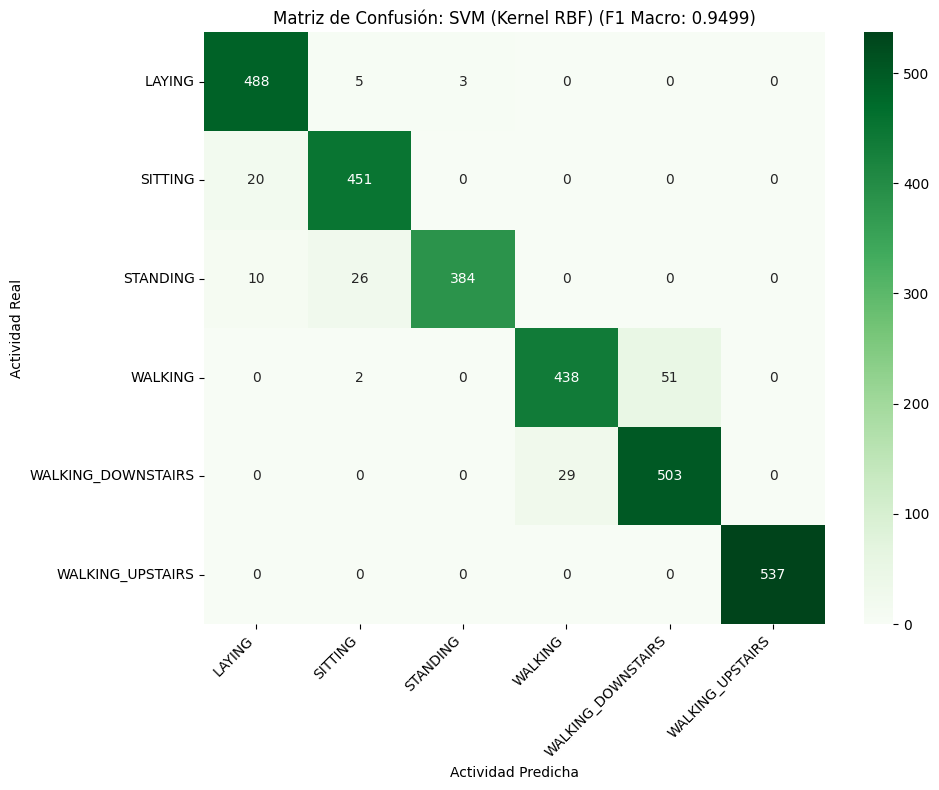

In [50]:
print(f"\nGenerando Matriz de Confusión para el Mejor Modelo: {best_model_name}")
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=activity_names_list, 
            yticklabels=activity_names_list)
plt.title(f'Matriz de Confusión: {best_model_name} (F1 Macro: {best_f1_macro:.4f})')
plt.ylabel('Actividad Real')
plt.xlabel('Actividad Predicha')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de importancia de características

In [51]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=254, n_jobs=-1)
rf_selector.fit(X_train_final, y_train_final)

importances = rf_selector.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_50_features = feature_imp_df.head(50)
top_50_names = top_50_features['Feature'].tolist()

print("Top 5 características más importantes:")
print(top_50_features.head(5))


def analizar_tipo(feature_name):
    sensor = 'Otro'
    dominio = 'Otro'
    
    if 'Acc' in feature_name: sensor = 'Acelerómetro'
    elif 'Gyro' in feature_name: sensor = 'Giroscopio'
    
    if feature_name.startswith('t'): dominio = 'Tiempo'
    elif feature_name.startswith('f'): dominio = 'Frecuencia'
    
    return sensor, dominio

analysis_results = [analizar_tipo(f) for f in top_50_names]
df_analysis = pd.DataFrame(analysis_results, columns=['Sensor', 'Dominio'])

print("\n--- Análisis del Top 50 Características ---")
print("Por Sensor:")
print(df_analysis['Sensor'].value_counts())
print("\nPor Dominio:")
print(df_analysis['Dominio'].value_counts())


Top 5 características más importantes:
                    Feature  Importance
558    angle(X,gravityMean)    0.030236
52      tGravityAcc-min()-X    0.028451
559    angle(Y,gravityMean)    0.028189
56   tGravityAcc-energy()-X    0.028074
41     tGravityAcc-mean()-Y    0.025798

--- Análisis del Top 50 Características ---
Por Sensor:
Sensor
Acelerómetro    47
Otro             3
Name: count, dtype: int64

Por Dominio:
Dominio
Tiempo        32
Frecuencia    15
Otro           3
Name: count, dtype: int64


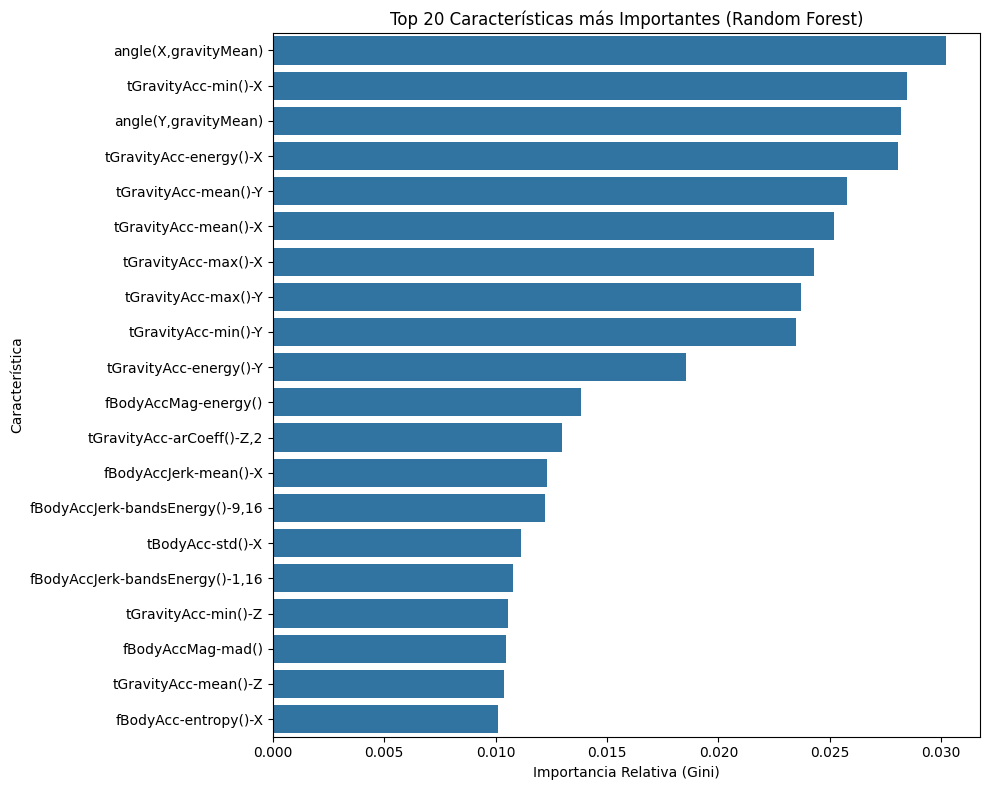

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20))
plt.title('Top 20 Características más Importantes (Random Forest)')
plt.xlabel('Importancia Relativa (Gini)')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [53]:
modelo_a_reentrenar = RandomForestClassifier(n_estimators=100, random_state=254) 
subsets = [50, 100, 200]
results_selection = []

print(f"\nReentrenando modelo ({modelo_a_reentrenar.__class__.__name__}) con características reducidas...")

for n in subsets:

    top_n_names = feature_imp_df.head(n)['Feature'].tolist()
    
    X_train_subset = X_train_final[top_n_names]
    X_test_subset = X_test_final[top_n_names]
    

    start = time.time()
    modelo_a_reentrenar.fit(X_train_subset, y_train_final)
    end = time.time()
    

    y_pred_sub = modelo_a_reentrenar.predict(X_test_subset)
    acc = accuracy_score(y_test_final, y_pred_sub)
    f1 = f1_score(y_test_final, y_pred_sub, average='macro')
    
    results_selection.append({
        'N Features': n,
        'Accuracy': acc,
        'Macro F1': f1,
        'Tiempo (s)': end - start
    })

df_selection = pd.DataFrame(results_selection)
print("\n--- Resultados de Selección de Características ---")
display(df_selection)


Reentrenando modelo (RandomForestClassifier) con características reducidas...

--- Resultados de Selección de Características ---


,N Features,Accuracy,Macro F1,Tiempo (s)
0,50,0.874449,0.873822,3.917471
1,100,0.910757,0.909410,6.015093
2,200,0.916525,0.914791,9.147303


### Reducción basada en varianza y correalación

In [54]:
var_threshold = 0.005
selector_var = VarianceThreshold(threshold=var_threshold)

selector_var.fit(X_train_final)

cols_variance_keep = X_train_final.columns[selector_var.get_support()]

X_train_var = X_train_final[cols_variance_keep]
X_test_var = X_test_final[cols_variance_keep]

print(f"Características originales: {X_train_final.shape[1]}")
print(f"Características tras filtro de varianza (< {var_threshold}): {X_train_var.shape[1]}")
print(f"-> Se eliminaron {X_train_final.shape[1] - X_train_var.shape[1]} características por baja varianza.")

Características originales: 561
Características tras filtro de varianza (< 0.005): 798
-> Se eliminaron -237 características por baja varianza.


In [55]:
corr_matrix = X_train_var.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_reduced = X_train_var.drop(columns=to_drop)
X_test_reduced = X_test_var.drop(columns=to_drop)

print(f"Características tras filtro de correlación (> 0.95): {X_train_reduced.shape[1]}")
print(f"-> Se eliminaron {len(to_drop)} características adicionales por redundancia.")
print(f"-> Total características finales: {X_train_reduced.shape[1]}")


Características tras filtro de correlación (> 0.95): 194
-> Se eliminaron 604 características adicionales por redundancia.
-> Total características finales: 194


In [56]:
models_reduced = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=254),
    'k-NN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results_reduction = []

print("\nEntrenando modelos con dataset reducido...")
for name, model in models_reduced.items():
    # Medir tiempo
    start = time.time()
    model.fit(X_train_reduced, y_train_final)
    end = time.time()
    train_time = end - start
    
    # Evaluar
    y_pred = model.predict(X_test_reduced)
    acc = accuracy_score(y_test_final, y_pred)
    
    results_reduction.append({
        'Modelo': name,
        'Num Features': X_train_reduced.shape[1],
        'Accuracy Reduced': acc,
        'Tiempo Reduced (s)': train_time
    })
df_reduction = pd.DataFrame(results_reduction)
print("\n--- TABLA DE RESULTADOS: CONJUNTO REDUCIDO ---")
display(df_reduction)


Entrenando modelos con dataset reducido...


c:\Users\axel0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- TABLA DE RESULTADOS: CONJUNTO REDUCIDO ---


,Modelo,Num Features,Accuracy Reduced,Tiempo Reduced (s)
0,Logistic Regression,194,0.949440,0.681145
1,k-NN (k=3),194,0.856804,0.006185
2,Random Forest,194,0.943672,2.577350


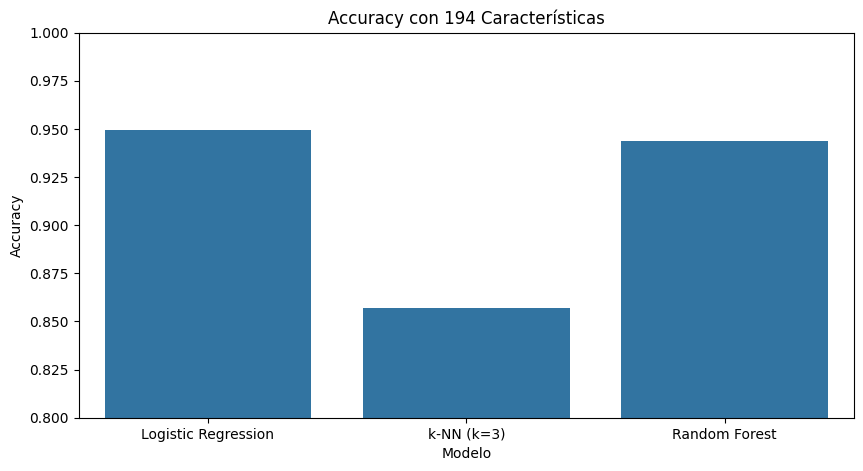

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='Accuracy Reduced', data=df_reduction)
plt.ylim(0.8, 1.0) # Ajustar escala para ver diferencias sutiles
plt.title(f'Accuracy con {X_train_reduced.shape[1]} Características')
plt.ylabel('Accuracy')
plt.show()

In [58]:
best_model = RandomForestClassifier(n_estimators=100, random_state=254)
best_model.fit(X_train_final, y_train_final)
y_pred_base = best_model.predict(X_test_final)


cm = confusion_matrix(y_test_final, y_pred_base)
classes = sorted(activity_labels['activity_name'].unique()) 

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

cm_no_diag = cm_df.copy()
np.fill_diagonal(cm_no_diag.values, 0)

max_error_val = cm_no_diag.max().max()
error_pos = cm_no_diag.stack().idxmax() 

print(f"\nMayor confusión: {max_error_val} muestras.")
print(f"Actividad REAL: '{error_pos[0]}' predicha erróneamente como '{error_pos[1]}'.")


Mayor confusión: 51 muestras.
Actividad REAL: 'WALKING' predicha erróneamente como 'WALKING_DOWNSTAIRS'.


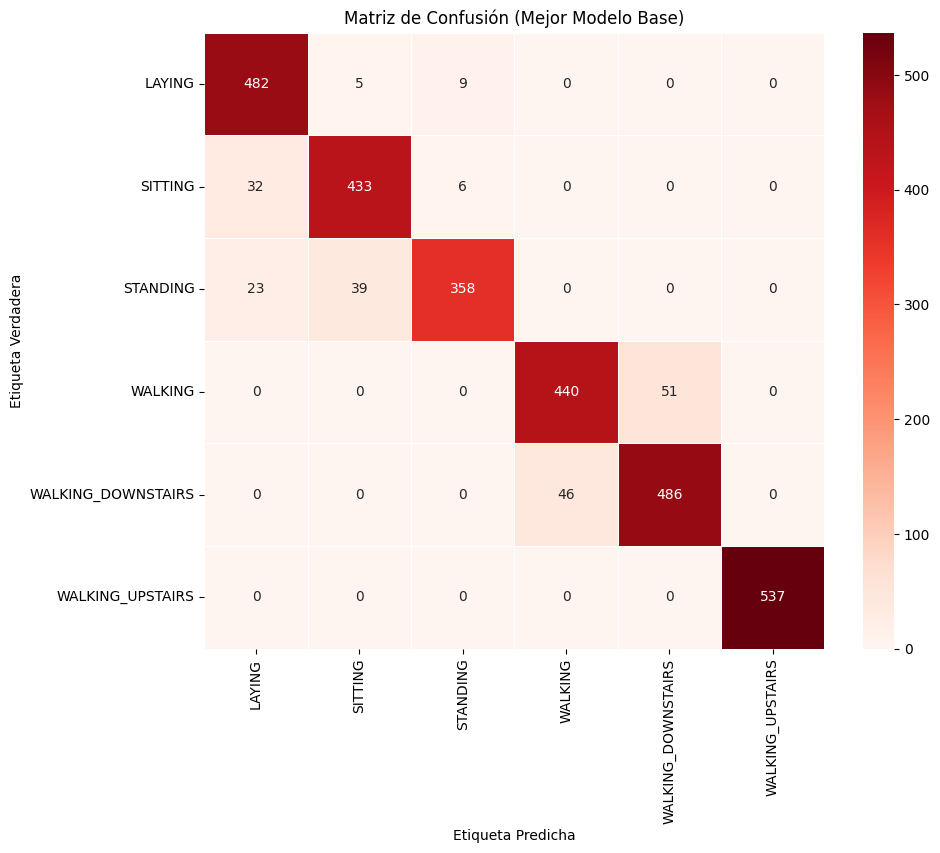

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.title('Matriz de Confusión (Mejor Modelo Base)')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


--- Análisis de Características Distintivas ---
Analizando par confundido: WALKING vs WALKING_DOWNSTAIRS


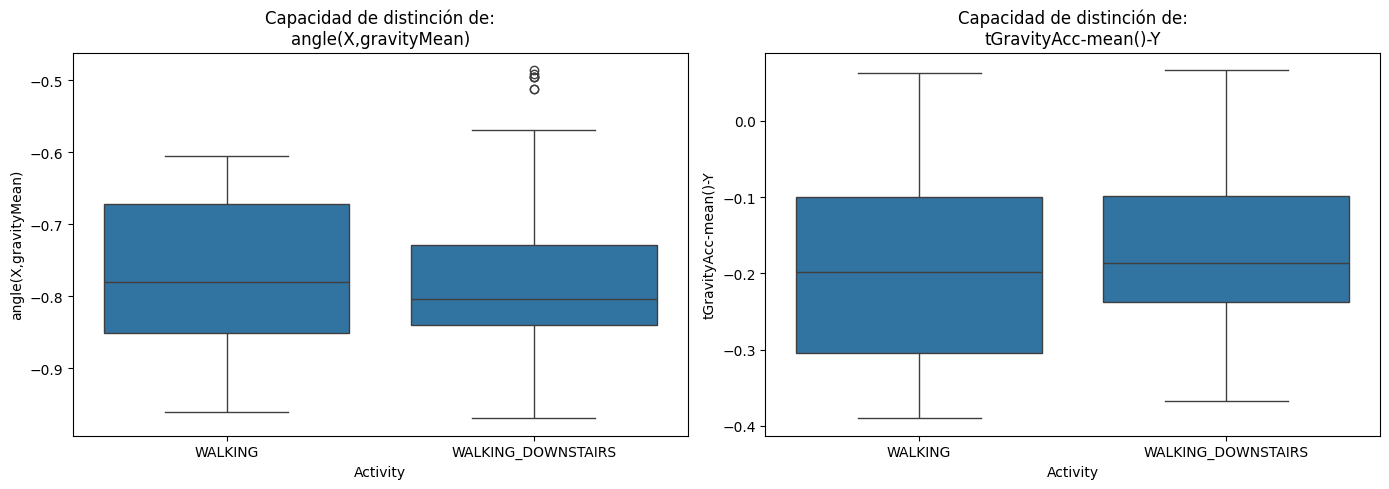

In [60]:
print("\n--- Análisis de Características Distintivas ---")
print(f"Analizando par confundido: {error_pos[0]} vs {error_pos[1]}")

distinguishing_feats = ['angle(X,gravityMean)', 'tGravityAcc-mean()-Y', 'tBodyAcc-energy()-X']

subset_mask = y_test['activity_name'].isin([error_pos[0], error_pos[1]])
X_subset = X_test_final[subset_mask].copy()
X_subset['Activity'] = y_test['activity_name'][subset_mask]

plt.figure(figsize=(14, 5))
for i, feat in enumerate(distinguishing_feats[:2]):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Activity', y=feat, data=X_subset)
    plt.title(f'Capacidad de distinción de:\n{feat}')
plt.tight_layout()
plt.show()

### Estrategias de mejora

In [61]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

print("Ejecutando GridSearchCV para Random Forest (esto puede tardar unos segundos)...")
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train_final, y_train_final)

best_rf_opt = grid_rf.best_estimator_
print(f"Mejores parámetros encontrados: {grid_rf.best_params_}")

--- 4.b) ESTRATEGIAS DE MEJORA ---

Ejecutando GridSearchCV para Random Forest (esto puede tardar unos segundos)...
Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [62]:
clf1 = best_rf_opt
clf2 = SVC(kernel='rbf', probability=True, random_state=42)
clf3 = LogisticRegression(max_iter=1000, random_state=42)

eclf = VotingClassifier(estimators=[('rf', clf1), ('svm', clf2), ('lr', clf3)], voting='soft')
eclf.fit(X_train_final, y_train_final)

print("Ensemble (Voting) entrenado exitosamente.")

Ensemble (Voting) entrenado exitosamente.



--- Comparación de Rendimiento Global (Macro F1) ---
Modelo Base:       0.9266
Modelo Optimizado: 0.9218
Ensemble Voting:   0.9585


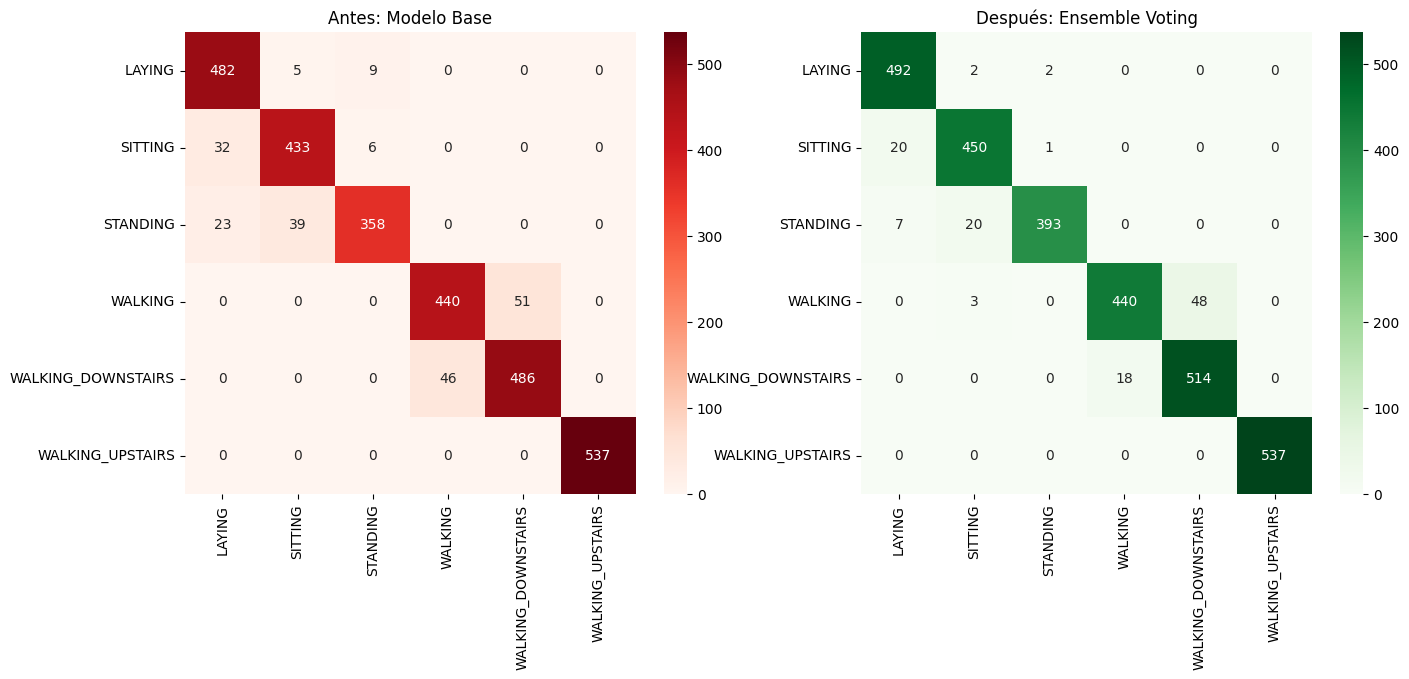

In [63]:
y_pred_opt = best_rf_opt.predict(X_test_final)
y_pred_ens = eclf.predict(X_test_final)

f1_base = f1_score(y_test_final, y_pred_base, average='macro')
f1_opt = f1_score(y_test_final, y_pred_opt, average='macro')
f1_ens = f1_score(y_test_final, y_pred_ens, average='macro')

print(f"\n--- Comparación de Rendimiento Global (Macro F1) ---")
print(f"Modelo Base:       {f1_base:.4f}")
print(f"Modelo Optimizado: {f1_opt:.4f}")
print(f"Ensemble Voting:   {f1_ens:.4f}")

cm_ens = confusion_matrix(y_test_final, y_pred_ens)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', ax=ax[0])
ax[0].set_title('Antes: Modelo Base')
sns.heatmap(pd.DataFrame(cm_ens, index=classes, columns=classes), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Después: Ensemble Voting')
plt.show()

In [64]:
report_base = classification_report(y_test_final, y_pred_base, target_names=classes, output_dict=True)
report_ens = classification_report(y_test_final, y_pred_ens, target_names=classes, output_dict=True)

print("\n--- Mejora en F1-Score por Clase ---")
mejora_data = []
for cls in classes:
    f1_b = report_base[cls]['f1-score']
    f1_e = report_ens[cls]['f1-score']
    mejora_data.append({
        'Clase': cls,
        'F1 Base': f1_b,
        'F1 Ensemble': f1_e,
        'Mejora': f1_e - f1_b
    })

df_mejora = pd.DataFrame(mejora_data).sort_values(by='Mejora', ascending=False)
display(df_mejora)


--- Mejora en F1-Score por Clase ---


,Clase,F1 Base,F1 Ensemble,Mejora
2,STANDING,0.902900,0.963235,0.060335
1,SITTING,0.913502,0.951374,0.037872
0,LAYING,0.933204,0.969458,0.036254
4,WALKING_DOWNSTAIRS,0.909261,0.939671,0.030410
3,WALKING,0.900716,0.927292,0.026575
5,WALKING_UPSTAIRS,1.000000,1.000000,0.000000
